In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import charset_normalizer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-electronics-retailers/Products.csv
/kaggle/input/global-electronics-retailers/Data_Dictionary.csv
/kaggle/input/global-electronics-retailers/Sales.csv
/kaggle/input/global-electronics-retailers/Stores.csv
/kaggle/input/global-electronics-retailers/Customers.csv
/kaggle/input/global-electronics-retailers/Exchange_Rates.csv


In [79]:
with open('/kaggle/input/global-electronics-retailers/Customers.csv','rb') as fle1:
    result1 = charset_normalizer.detect(fle1.read(1000000))
    print(result1)

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


In [80]:
custs = pd.read_csv('/kaggle/input/global-electronics-retailers/Customers.csv', encoding='windows-1250')

In [81]:
with open('/kaggle/input/global-electronics-retailers/Exchange_Rates.csv','rb') as fle1:
    result2 = charset_normalizer.detect(fle1.read(10000000))
    print(result2)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [82]:
e_rates = pd.read_csv('/kaggle/input/global-electronics-retailers/Exchange_Rates.csv')

In [83]:
prods = pd.read_csv('/kaggle/input/global-electronics-retailers/Products.csv')
sales = pd.read_csv('/kaggle/input/global-electronics-retailers/Sales.csv')
stores = pd.read_csv('/kaggle/input/global-electronics-retailers/Stores.csv')

In [84]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [85]:
e_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [86]:
prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [87]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [88]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


 Dataset 1: Store Information

* What is the distribution of store sizes (Square Meters)?
* Which country has the highest number of stores?
* How does the distribution of store sizes vary across different states?
* Is there a relationship between the store's opening date and its size?
* Are there any missing values in the Square Meters column?

In [89]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


Text(0.5, 1.0, 'Distribution of Store sizes (Square Meters)')

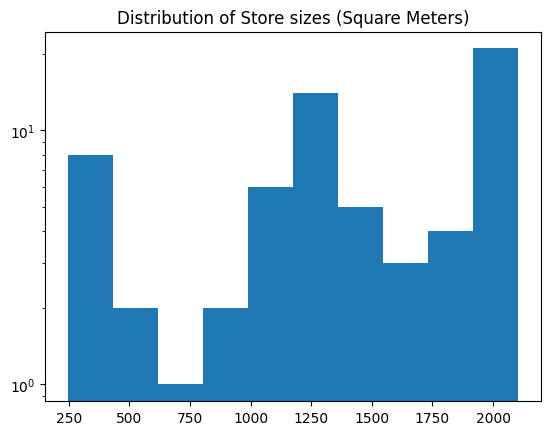

In [90]:
stores['Square Meters'].hist(grid=False)
plt.yscale('log')
plt.title('Distribution of Store sizes (Square Meters)')

In [91]:
stores.groupby('Country')['StoreKey'].count().idxmax()
#Country with the most stores.

'United States'

In [92]:
stores['Open Date'] = pd.to_datetime(stores['Open Date'], errors='coerce')

In [93]:
sum(stores.State.value_counts()>1)

0

Text(0.5, 1.0, 'Top 20 States ranked by Store sizes')

<Figure size 2000x1000 with 0 Axes>

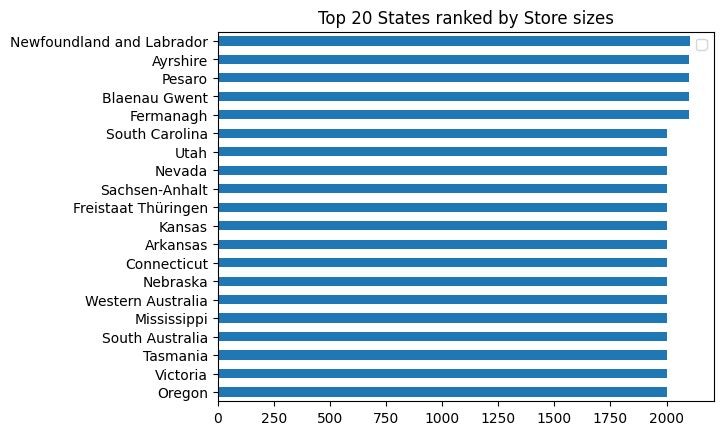

In [94]:
plt.figure(figsize=(20,10))
stores_sorted = stores.sort_values('Square Meters', ascending=False)
stores_sorted.iloc[:20].sort_values('Square Meters').plot.barh(x='State',y='Square Meters')
plt.ylabel('')
plt.legend('')
plt.title('Top 20 States ranked by Store sizes')

Text(0.5, 1.0, 'No Visible Correlation between "Open Date" and "Store size"')

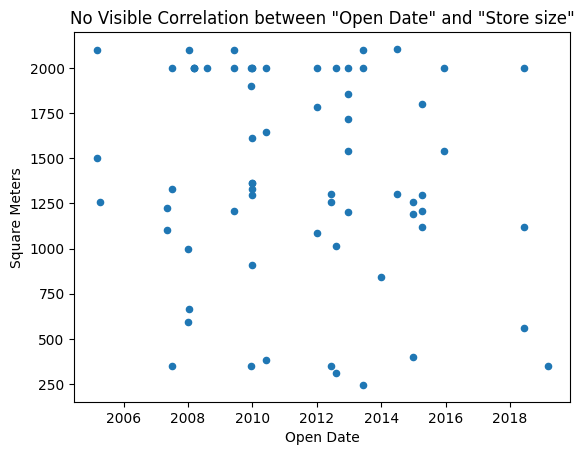

In [95]:
stores.plot.scatter(x='Open Date',y='Square Meters')
plt.title('No Visible Correlation between "Open Date" and "Store size"')

Dataset 2: Sales Information

* What is the distribution of order quantities?
* How does the order frequency vary over time?
* Is there a relationship between the delivery date and the order date?
* Which store has the highest number of orders?
* What is the most commonly ordered product?

In [96]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


Text(0.5, 1.0, 'Distribution of Order Quantity')

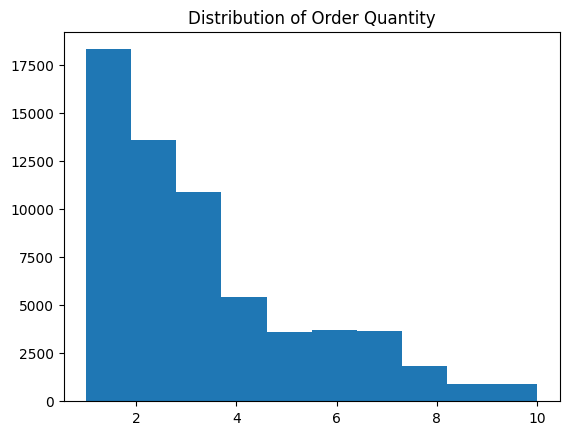

In [97]:
sales.Quantity.hist(grid=False)
plt.title('Distribution of Order Quantity')

<Axes: title={'center': 'Order quantity over the years'}, xlabel='Order Date', ylabel='Quantity'>

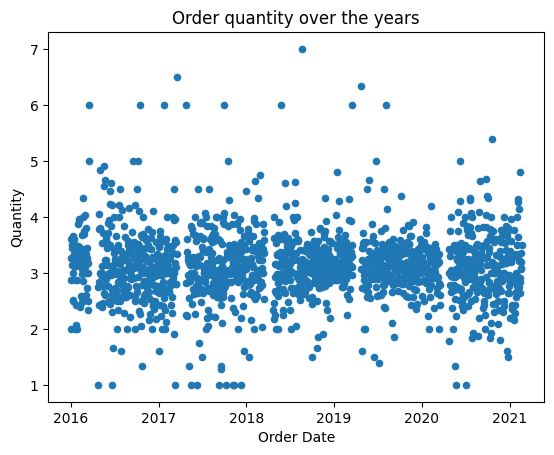

In [98]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'],errors='coerce')
sales.groupby('Order Date')['Quantity'].mean().reset_index().plot(kind='scatter',x='Order Date',y='Quantity', title='Order quantity over the years')

Over the years, most of the orders were between 2 and 4 in number.

In [99]:
from scipy.stats import pearsonr

stats, pval= pearsonr(sales['Quantity'],sales['Order Date'].astype(int))
alpha = 0.05
#Null hypothesis: Over the years the order quantity does not change.
#Alternate hypothesis: Over the years the Order quantity changes.

if pval< alpha:
    print('Reject null hypothesis.')
    print('There is statistical evidence that over the years there is a change in order quantity.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence that over the years there is a change in order quantity.')

Fail to reject null hypothesis.
There is no statistical evidence that over the years there is a change in order quantity.


In [100]:
#Which store has the highest number of orders?
sales.groupby('StoreKey')['Order Number'].count().idxmax()

0

Store '0' has the highest number of orders.

In [101]:
sales.groupby('StoreKey')['Order Number'].count().sort_values(ascending=False).iloc[:10]

StoreKey
0     13165
9      1577
50     1519
55     1518
54     1498
61     1485
59     1472
45     1471
57     1442
44     1436
Name: Order Number, dtype: int64

In [102]:
#What is the most commonly ordered product?
sales.merge(prods,on='ProductKey').groupby('Product Name').size().idxmax()

'Adventure Works Desktop PC2.30 MD230 Black'

Dataset 3: Product Information

* What are the most popular product categories?
* Is there a difference in unit price across different product categories?
* How does the distribution of product colors vary?
* Are there any missing values in the Unit Cost USD or Unit Price USD columns?
* How many unique products are there in each category?

In [103]:
prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


Text(0.5, 1.0, 'Frequency of Products in each Category')

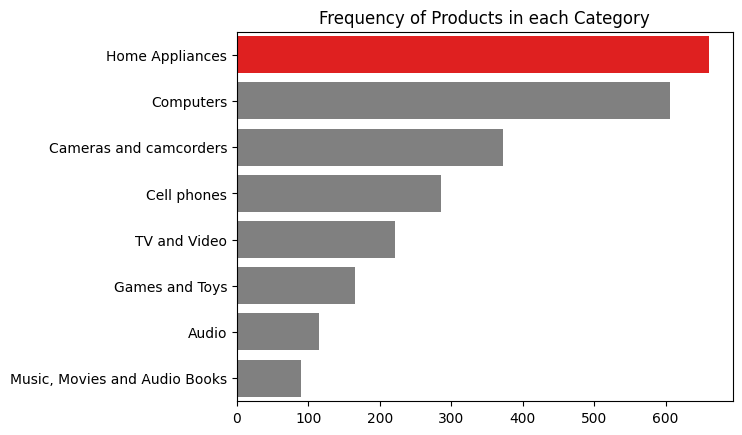

In [104]:
x=prods.groupby('Category')['ProductKey'].size().sort_values(ascending=False).iloc[:10].reset_index(name='count')
sns.barplot(y=x['Category'],x=x['count'], palette=['red']+['grey']*7)
plt.ylabel('')
plt.xlabel('')
plt.title('Frequency of Products in each Category')

In [105]:
len([1,2,3])

3

In [106]:
unique_prods = {}
cats = list(prods.Category.unique())
for i in cats:
    unique_prods[i]=len(list(prods.loc[prods.Category==i,'Product Name'].unique()))


In [107]:
unique_prods

{'Audio': 115,
 'TV and Video': 222,
 'Computers': 606,
 'Cameras and camcorders': 372,
 'Cell phones': 285,
 'Music, Movies and Audio Books': 90,
 'Games and Toys': 166,
 'Home Appliances': 661}

Text(0.5, 1.0, 'Unique Products in each category')

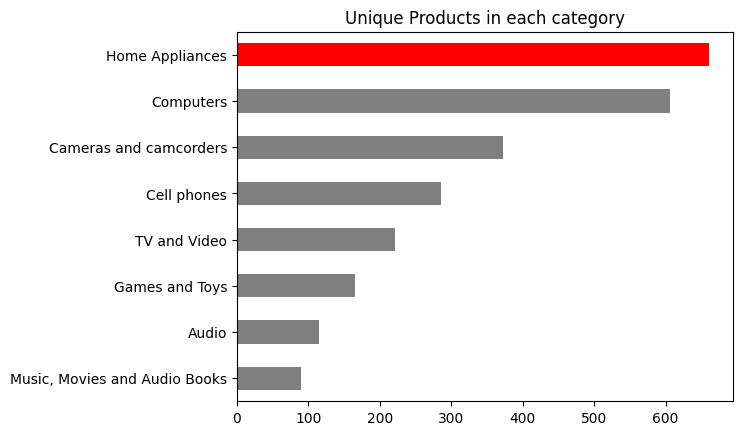

In [108]:
df = pd.Series(index=list(unique_prods.keys()),data=list(unique_prods.values()))
df.sort_values().plot.barh(color=['grey']*7+['red'])
plt.title('Unique Products in each category')

Dataset 4: Exchange Rate Information

* How does the exchange rate fluctuate over time?
* Is there a relationship between the exchange rate and the currency?
* Which currency has the highest exchange rate?
* Are there any outliers in the exchange rate data?
* Is the exchange rate stable over the observed period?

In [109]:
e_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [110]:
e_rates.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [111]:
e_rates.isna().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [112]:
e_rates.Date = pd.to_datetime(e_rates.Date, errors='coerce')

In [113]:
e_rates.Currency.unique()
#There are 5 unique Currencies in the dataset

array(['USD', 'CAD', 'AUD', 'EUR', 'GBP'], dtype=object)

In [114]:
usd = e_rates.loc[e_rates.Currency=='USD']
cad = e_rates.loc[e_rates.Currency=='CAD']
aud = e_rates.loc[e_rates.Currency=='AUD']
eur = e_rates.loc[e_rates.Currency=='EUR']
gbp = e_rates.loc[e_rates.Currency=='GBP']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Exchange'>

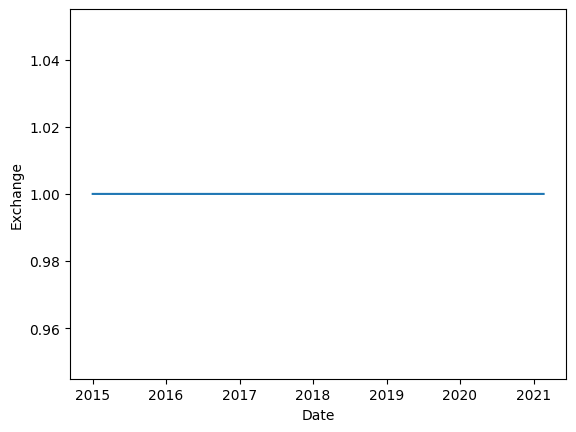

In [115]:
sns.lineplot(data=usd,x='Date',y='Exchange')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Exchange'>

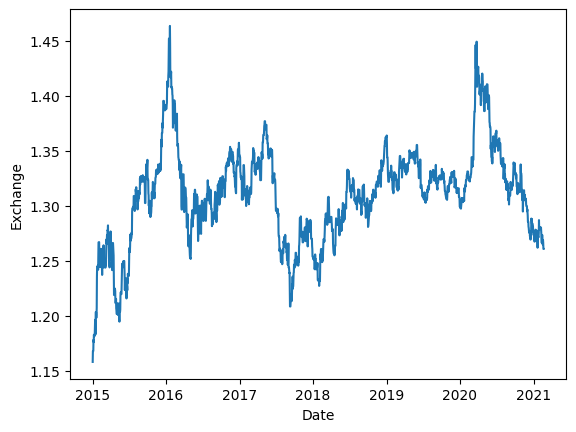

In [116]:
sns.lineplot(data=cad,x='Date',y='Exchange')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Exchange'>

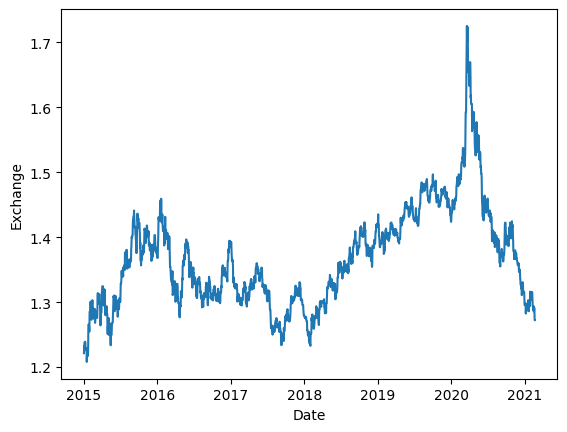

In [117]:
sns.lineplot(data=aud,x='Date',y='Exchange')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Exchange'>

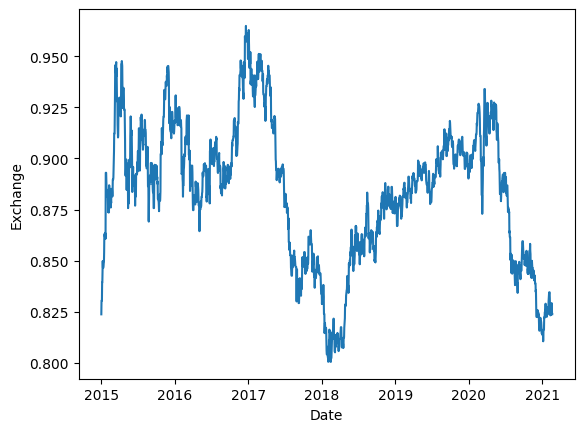

In [118]:
sns.lineplot(data=eur,x='Date',y='Exchange')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Exchange'>

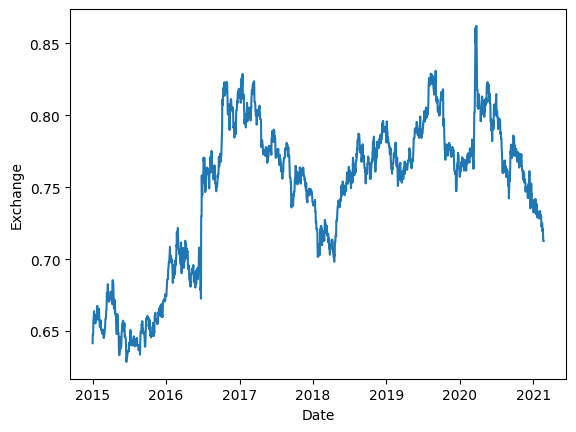

In [119]:
sns.lineplot(data=gbp,x='Date',y='Exchange')

In [120]:
#Is there a relationship between the exchange rate and the currency?
from scipy.stats import f_oneway
fstats, pval = f_oneway(usd.Exchange,cad.Exchange,aud.Exchange,eur.Exchange,gbp.Exchange)

if pval<0.05:
    print('Reject null hypothesis.')
    print('There is statistically significant evidence to prove that currency has an influence on the exchange rate.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistically significant evidence to prove that currency has an influence on the exchange rate.')

Reject null hypothesis.
There is statistically significant evidence to prove that currency has an influence on the exchange rate.


In [121]:
#Which Currency has the highest exchange rate?
e_rates.groupby('Currency')['Exchange'].max().idxmax()

'AUD'

Text(0.5, 1.0, 'Box plot of exchange rates')

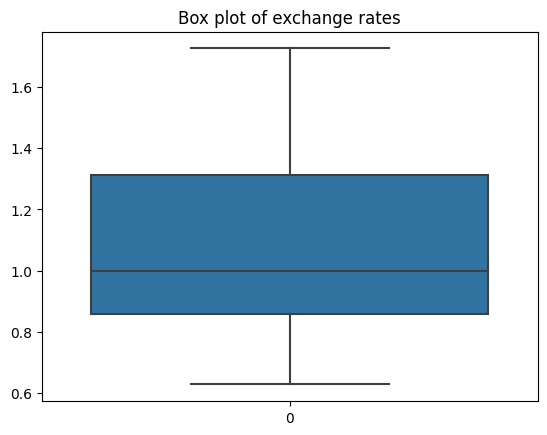

In [122]:
sns.boxplot(e_rates.Exchange)
plt.title('Box plot of exchange rates')

There are no outliers present in the exchange rates data.

In [135]:
sum(usd.Exchange!=1.0)

0

All exchange rates but 'USD' are not stable.

Dataset 5: Customer Information

* What is the gender distribution of customers?
* How does the distribution of customer ages vary across different countries?
* Are there any duplicate entries in the dataset?
* What is the distribution of customers across different continents?
* Is there a relationship between customer gender and their birthday?

In [124]:
custs.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


Text(0.5, 1.0, 'Gender distribution of Customers')

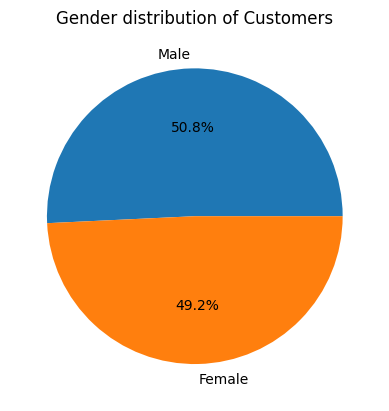

In [125]:
custs.Gender.value_counts().plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('Gender distribution of Customers')

In [126]:
custs.duplicated().sum()
#There are no duplicates

0

In [127]:
custs.Continent.unique()

array(['Australia', 'North America', 'Europe'], dtype=object)

Text(0.5, 1.0, 'Total Customers per Continent')

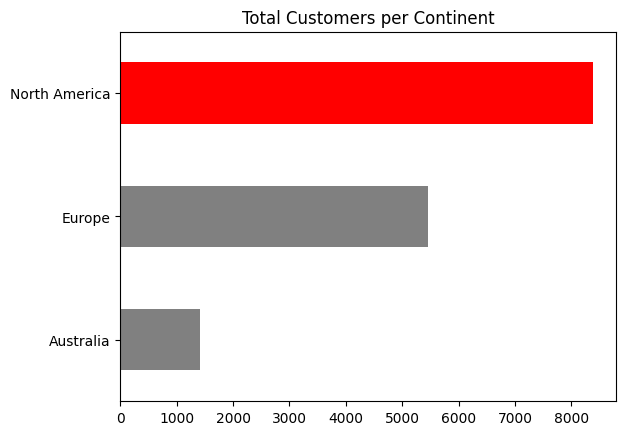

In [128]:
custs.groupby('Continent')['CustomerKey'].size().plot(kind='barh',stacked=True, color=['grey','grey','red'])
plt.ylabel('')
plt.title('Total Customers per Continent')

In [129]:
custs.Birthday = pd.to_datetime(custs.Birthday, errors='coerce')
custs['Birthday_i'] = custs.Birthday.astype(int)

In [130]:
custs.Birthday_i.head()

0   -962496000000000000
1    307238400000000000
2   -713318400000000000
3   -387849600000000000
4   -129945600000000000
Name: Birthday_i, dtype: int64

In [138]:
from datetime import datetime 
custs['Age'] = datetime(2024,5,1)-custs['Birthday']

In [136]:
from scipy.stats import ttest_ind
male =custs.loc[custs.Gender=='Male','Birthday_i']
female =custs.loc[custs.Gender=='Female','Birthday_i']

tstat, pval = ttest_ind(male,female)
if pval<0.05:
    print('Reject null hypothesis.')
    print('There is statistical evidence that Birthdays are influenced by gender.')
else:
    print('Fail to reject null hypothesis.')
    print('There is no statistical evidence that Birthdays are influenced by gender.')

Fail to reject null hypothesis.
There is no statistical evidence that Birthdays are influenced by gender.


In [150]:
custs['Age'] = custs['Age'].astype('string').apply(lambda a: a.split(' ')[0]).astype(int)//365.25

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Distribution of ages per Country')

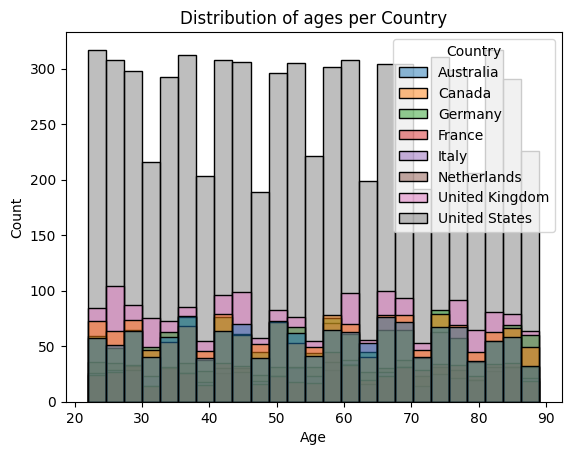

In [157]:
sns.histplot(data=custs,x='Age',hue='Country')
plt.title('Distribution of ages per Country')